## Kalibracija laserjev

Marsovske ladje se zdaj boljše skrivajo in SOVA jim ni več kos. Na srečo je priskočila na pomoč [moskovska sadjarska zadruga](https://img.nn2.ru/galleryview/0/userfiles/data/ufiles/2021-09/11/27/61/6141714bcfb51_0.jpg) MOSSAD z dvema funkcijama.

- `r(koordinate)` vrne polmer kroga, katerega središče je na podanih koordinatah. Koordinati podamo s terko, na primer `r((5.25, 8.625))`.
- `notranji(koordinate)` vrne množico središč vseh krogov, ki se nahajajo *neposredno* znotraj kroga s podanim središčem. Pri krogih na spodnji sliki bo za krog s središčem v (0, 10) vrnil le tri (večje) kroge, ne pa dveh, ki sta potem še bolj znotraj.

Tidve funkciji sta podani. Kako delujeta, ni pomembno; MOSSAD-u bi bilo ljubše, če ne veš.

Zaradi konstrukcijskih zahtev (vsak krog je pritrjen z vijakom skozi središče in na Marsu nimajo vijakov, ki bi bili daljši od debeline dveh plošč) se nikoli ne zgodi, da bi imela dva kroga isto središče.

Pred napadom bo potrebno natančno kalibrirati moč laserjev in jih pravilno usmeriti. Moč laserja mora biti enaka površini vseh krogov, ki sestavljajo ladjo. Laser je potrebno usmeriti v središče najmanjšega kroga, ki sestavlja ladjo.

### Obvezna naloga

Napiši naslednji funkciji.

- `povrsina(koord)` vrne skupno površino vseh krogov, ki sestavljajo ladjo s središčem, podanim s terko `koord`.

- `najmanjsi(koord)` vrne središče najmanjšega izmed krogov, ki sestavljajo ladjo.

To je vaja iz rekurzije, torej morata biti funkciji rekurzivni. V izogib skušnjavam in čudnim rešitvam, dodatne funkcije niso dovoljene, funkciji pa ne smeta imeti dodatnih argumentov (niti s privzetimi vrednostmi).

### Dodatna naloga

Funkciji naj bosta napisani v eni vrstici.

Na ta način sta pravzaprav preprostejši. Pozorno preberi dokumentacijo funkcije [min](https://docs.python.org/3/library/functions.html#min).

### O testih

Testi uporabljajo tri postavitve ladij. Kažejo jih spodnje slike, le da se vzorec pri drugi in tretji nadaljuje, tako da imamo tam tisoče in tisoče krogov.

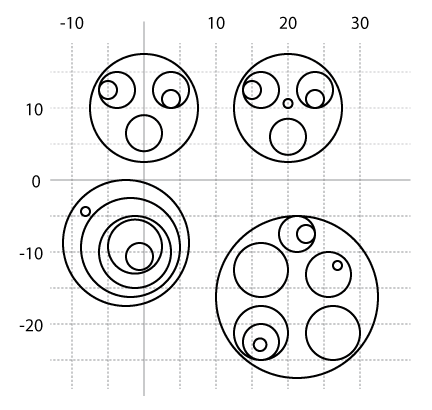
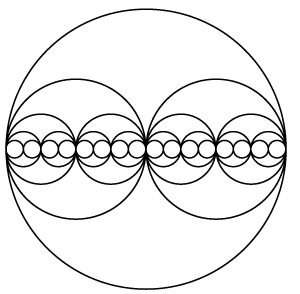
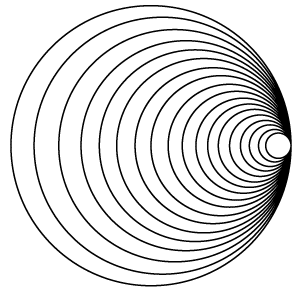


### Rešitev

Prva funkcija je na las podobna funkciji, ki izračuna velikost rodbine. Vsak krog k svoji površini prišteje površine, ki jih javijo njegovi otroci.

In [1]:
def povrsina(koord):
    s = pi * r(koord) ** 2
    krogi_znotraj = notranji(koord)
    for krog in krogi_znotraj:
        s += povrsina(krog)
    return s

V eni vrstici je to tako.

In [2]:
def povrsina(koord):
    return pi * r(koord) ** 2 + sum(povrsina(krog) for krog in notranji(koord))

Druga funkcija, `najmanjsi`, je podobna funkciji, ki poišče najkrajše ime v rodbini.

In [3]:
def najmanjsi(koord):
    naj = koord
    for krog in notranji(koord):
        ta_naj = najmanjsi(krog)
        if r(ta_naj) < r(naj):
            naj = ta_naj
    return naj


Za začetek predpostavimo, da je najmanjši krog ta, ki smo ga dobili kot argument. Nato gremo čez vse kroge znotraj njega. Vsakega vprašamo po najmanjšem krogu in če je polmer tega kroga manjši od najmanjšega doslej (to bo, v primeru, da ima krog kakšne notranje kroge, gotovo res vsaj pri prvem od njih), si ga zapomnimo kot najmanjšega.

Rešitev v eni vrstici je takšna:

In [4]:
def najmanjsi(koord):
    return min([najmanjsi(krog) for krog in notranji(koord)], key = r, default=koord)

Sestavimo seznam najmanjših krogov znotraj vseh notranjih, `[najmanjsi(krog) for krog in notranji(koord)]`. S funkcijo `min` poiščemo minimalni element, pri čemer kot ključ, po katerem primerjamo te elemente, uporabimo polmer, `key=r`. Če krog nima notranjih krogov in je seznam prazen, naj `min` kot privzeto vrednost vrne koordinate trenutnega kroga.

Meni je še všečnejša tale različica, ki s funkcijo `map` (o kateri smo se učili kvečjemu na "naprednejših" predavanjih) pokliče `najmanjsi` za vsak `notranji(koord)`.

In [5]:
def najmanjsi(koord):
    return min(map(najmanjsi, notranji(koord)), key = r, default=koord)